In [2]:
#run this once per kernal crash
!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
!apt-get install libpython3.6-dev

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: root_build/tutorials/hsimple.root  
   creating: root_build/tutorials/gui/
  inflating: root_build/tutorials/gui/iconAsXPMData.C  
  inflating: root_build/tutorials/gui/splitterVertical.C  
  inflating: root_build/tutorials/gui/guitest_playback.C  
  inflating: root_build/tutorials/gui/customTH1Fmenu.C  
  inflating: root_build/tutorials/gui/worldmap.jpg  
  inflating: root_build/tutorials/gui/calendar.C  
  inflating: root_build/tutorials/gui/mditest.C  
  inflating: root_build/tutorials/gui/Slider3Demo.C  
  inflating: root_build/tutorials/gui/mditestbg.xpm  
  inflating: root_build/tutorials/gui/textEntries.C  
  inflating: root_build/tutorials/gui/ntupleTableTest.C  
  inflating: root_build/tutorials/gui/customContextMenu.C  
  inflating: root_build/tutorials/gui/splitterHorizontal.C  
  inflating: root_build/tutorials/gui/guiWithCINT.C  
  inflating: root_build/tutorials/gui/CPUMeter.C  
  inflating: roo

In [3]:
# The following is needed because colab upgraded the openssl library
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-03-10 16:12:05--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.91.82, 91.189.91.83, 185.125.190.36, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.91.82|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  6.10MB/s    in 0.2s    

2024-03-10 16:12:06 (6.10 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’ saved [1318204/1318204]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 121899 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-l

In [4]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')

import numpy as np


In [5]:
!mkdir LHCb_Data && cd LHCb_Data && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root

--2024-03-10 16:13:02--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetDown.root
Resolving opendata.cern.ch (opendata.cern.ch)... 137.138.6.31, 2001:1458:201:8b::100:1c8
Connecting to opendata.cern.ch (opendata.cern.ch)|137.138.6.31|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 666484974 (636M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetDown.root’

B2HHH_MagnetDown.ro 100%[===================>] 635.61M  27.2MB/s    in 24s     

2024-03-10 16:13:26 (26.3 MB/s) - ‘B2HHH_MagnetDown.root’ saved [666484974/666484974]



In [6]:
!pip install uproot
import uproot
import ROOT

Welcome to JupyROOT 6.28/04


In [7]:
# upload the files through uproot

events = uproot.open("/content/LHCb_Data/B2HHH_MagnetDown.root")

tree = events["DecayTree"]

momentum_px1 = tree.arrays(["H1_PX"], library="np")

momentum_py1 = tree.arrays(["H1_PY"], library="np")

momentum_pz1 = tree.arrays(["H1_PZ"], library="np")

momentum_px2 = tree.arrays(["H2_PX"], library="np")

momentum_py2 = tree.arrays(["H2_PY"], library="np")

momentum_pz2 = tree.arrays(["H2_PZ"], library="np")

momentum_px3 = tree.arrays(["H3_PX"], library="np")

momentum_py3 = tree.arrays(["H3_PY"], library="np")

momentum_pz3 = tree.arrays(["H3_PZ"], library="np")



In [8]:
#calculate the total momentum of daughters
tot_momentum1 = []
tot_momentum2 = []
tot_momentum3 = []
for i in range(len(momentum_px1['H1_PX'])):
    tot_momentum1.append(np.sqrt((momentum_px1["H1_PX"][i])**2 + (momentum_py1["H1_PY"][i])**2 + (momentum_pz1["H1_PZ"][i])**2))
for i in range(len(momentum_px2['H2_PX'])):
    tot_momentum2.append(np.sqrt((momentum_px2["H2_PX"][i])**2 + (momentum_py2["H2_PY"][i])**2 + (momentum_pz2["H2_PZ"][i])**2))
for i in range(len(momentum_px3['H3_PX'])):
    tot_momentum3.append(np.sqrt((momentum_px3["H3_PX"][i])**2 + (momentum_py3["H3_PY"][i])**2 + (momentum_pz3["H3_PZ"][i])**2))

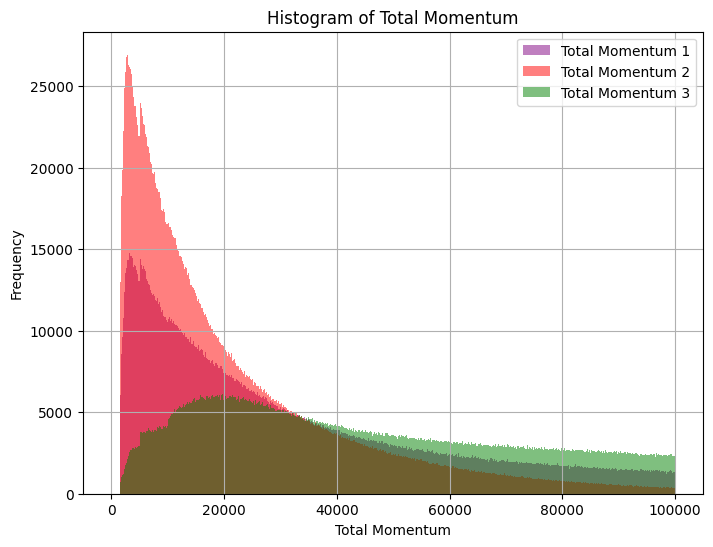

In [53]:
import matplotlib.pyplot as plt
#use the histogram plotting tools, plot the momentum of the daughters

plt.figure(figsize=(8, 6))
plt.hist(tot_momentum1, bins=1000, color='purple', alpha=0.5, range = (0, 10e4), label='Total Momentum 1'  )
plt.hist(tot_momentum2, bins=1000, color='red', alpha=0.5, range = (0, 10e4), label='Total Momentum 2')
plt.hist(tot_momentum3, bins=1000, color='green', alpha=0.5, range = (0, 10e4), label='Total Momentum 3'  )
plt.xlabel('Total Momentum')
plt.ylabel('Frequency')
plt.title('Histogram of Total Momentum')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [10]:
# calculate the total momentum of the mother

totx_momentum = []
toty_momentum = []
totz_momentum = []


for i in range(len(momentum_px1['H1_PX'])):
    totx_momentum.append(momentum_px1["H1_PX"][i]+momentum_px2["H2_PX"][i]+momentum_px3["H3_PX"][i])
    toty_momentum.append(momentum_py1["H1_PY"][i]+momentum_py2["H2_PY"][i]+momentum_py3["H3_PY"][i])
    totz_momentum.append(momentum_pz1["H1_PZ"][i]+momentum_pz2["H2_PZ"][i]+momentum_pz3["H3_PZ"][i])

mother_momentum=[]

for i in range(len(totx_momentum)):
    mother_momentum.append(np.sqrt(totx_momentum[i]**2 + toty_momentum[i]**2 + totz_momentum[i]**2))


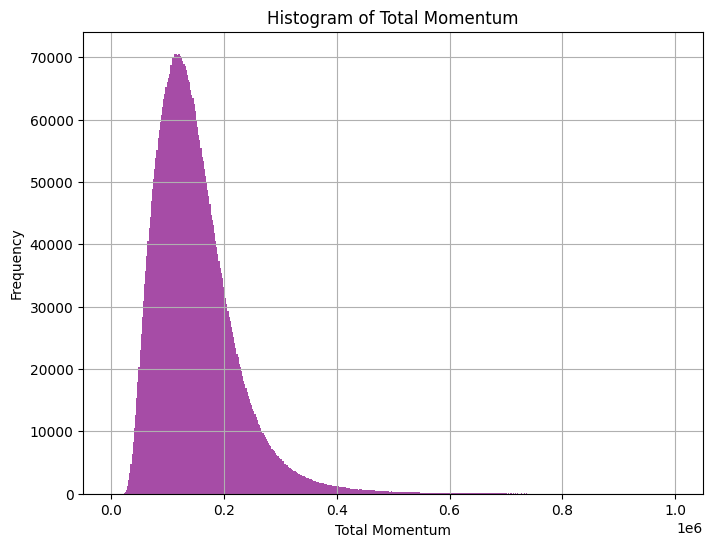

In [11]:
# plot momentum of mother

plt.figure(figsize=(8, 6))
plt.hist(mother_momentum, bins=500, color='purple', alpha=0.7, range = (0, 10e5)  )
plt.xlabel('Total Momentum')
plt.ylabel('Frequency')
plt.title('Histogram of Total Momentum')
plt.grid(True)
plt.show()

In [12]:
# define the mass of daughters

m_daughter = 493.677 #same mass for both K+ and K-, expressed in MeV/c^2

# calculate the energy of daughters

energy_daughter1 = []
energy_daughter2 = []
energy_daughter3 = []

for i in range (len(tot_momentum1)):
    energy_daughter1.append(np.sqrt(m_daughter ** 2 + tot_momentum1[i] ** 2))
    energy_daughter2.append(np.sqrt(m_daughter ** 2 + tot_momentum2[i] ** 2))
    energy_daughter3.append(np.sqrt(m_daughter ** 2 + tot_momentum3[i] ** 2))

energy_daughter1 = np.array(energy_daughter1)
energy_daughter2 = np.array(energy_daughter2)
energy_daughter3 = np.array(energy_daughter3)

In [14]:
# define the energy of the mother as the sum of energies of the daughters

energy_mother = energy_daughter1 + energy_daughter2 + energy_daughter3

mass_mother = []
# define mass of the mother

for i in range (len(tot_momentum1)):
    mass_mother.append(np.sqrt(energy_mother[i] ** 2 - mother_momentum[i] ** 2))
mass_mother = np.array(mass_mother)

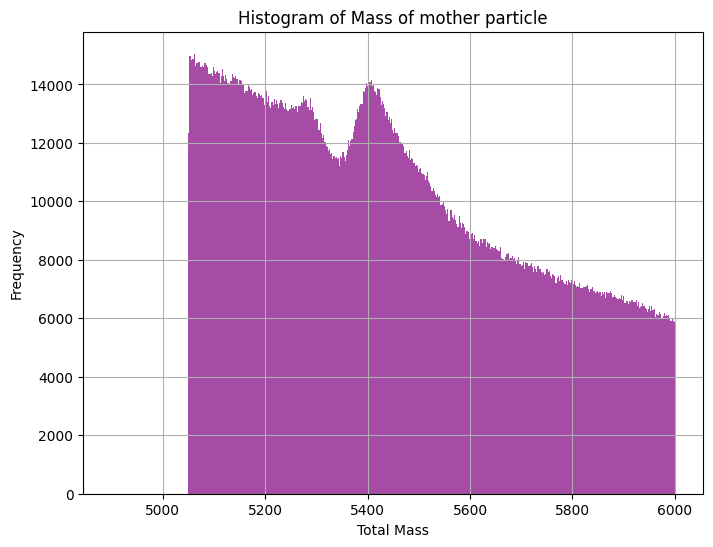

In [15]:
# plot mass of mother

plt.figure(figsize=(8, 6))
plt.hist(mass_mother, bins=500, color='purple', alpha=0.7 , range=(4900, 6000) )
plt.xlabel('Total Mass')
plt.ylabel('Frequency')
plt.title('Histogram of Mass of mother particle')
plt.grid(True)
plt.show()

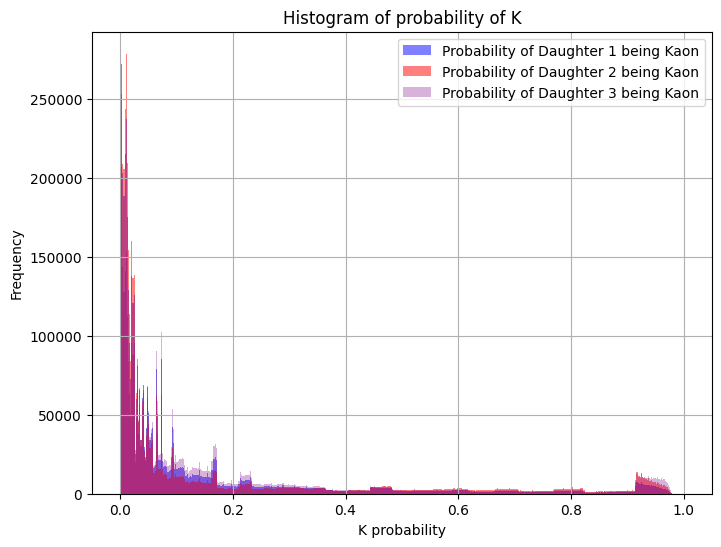

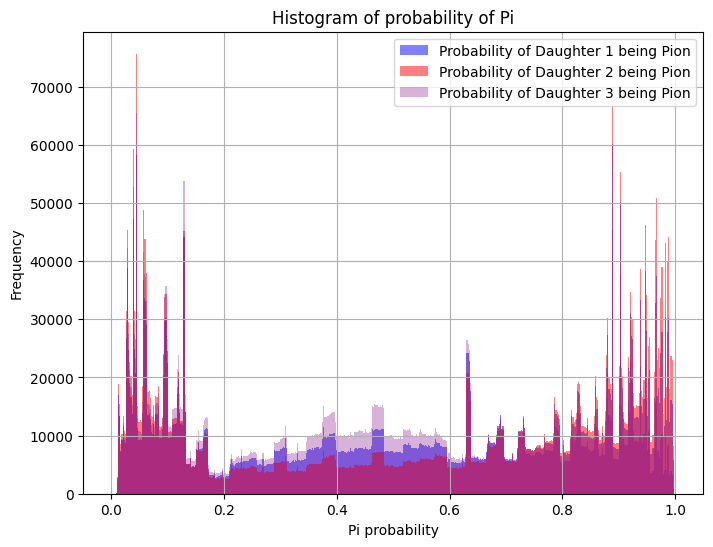

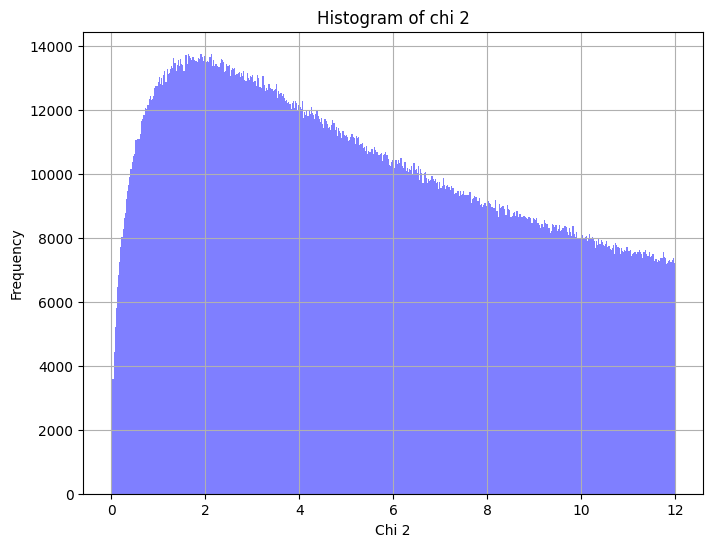

In [16]:
#Make plots of H1/H2/H3 _ProbK on one plot

probK1 = tree.arrays(["H1_ProbK "], library="np")
probK2 = tree.arrays(["H2_ProbK "], library="np")
probK3 = tree.arrays(["H3_ProbK "], library="np")

plt.figure(figsize=(8, 6))
plt.hist(probK1["H1_ProbK "], bins=500, color='blue', alpha=0.5 , range=(0,1), label='Probability of Daughter 1 being Kaon')
plt.hist(probK2["H2_ProbK "], bins=500, color='red', alpha=0.5 , range=(0,1), label='Probability of Daughter 2 being Kaon' )
plt.hist(probK3["H3_ProbK "], bins=500, color='purple', alpha=0.3 , range=(0,1), label='Probability of Daughter 3 being Kaon')
plt.xlabel('K probability')
plt.ylabel('Frequency')
plt.title('Histogram of probability of K')
plt.legend()
plt.grid(True)
plt.show()

#Make plots of H1/H2/H3 _ProbPi on one plot

probPi1 = tree.arrays(["H1_ProbPi "], library="np")
probPi2 = tree.arrays(["H2_ProbPi "], library="np")
probPi3 = tree.arrays(["H3_ProbPi "], library="np")

plt.figure(figsize=(8, 6))
plt.hist(probPi1["H1_ProbPi "], bins=500, color='blue', alpha=0.5 , range=(0,1), label='Probability of Daughter 1 being Pion')
plt.hist(probPi2["H2_ProbPi "], bins=500, color='red', alpha=0.5 , range=(0,1), label='Probability of Daughter 2 being Pion' )
plt.hist(probPi3["H3_ProbPi "], bins=500, color='purple', alpha=0.3 , range=(0,1), label='Probability of Daughter 3 being Pion')
plt.xlabel('Pi probability')
plt.ylabel('Frequency')
plt.title('Histogram of probability of Pi')
plt.legend()
plt.grid(True)
plt.show()

#For all our particles, make a plot of the B_VertexChi2

chi2 = tree.arrays(["B_VertexChi2"], library="np")

plt.figure(figsize=(8, 6))
plt.hist(chi2["B_VertexChi2"], bins=500, color='blue', alpha=0.5 , range=(0,12))
plt.xlabel('Chi 2')
plt.ylabel('Frequency')
plt.title('Histogram of chi 2')
plt.grid(True)
plt.show()





In [13]:
# make selection for uproot
selection=("(H1_ProbK>0.6)&(H2_ProbK>0.6)&(H3_ProbK>0.6)&(H1_isMuon==0)&(H2_isMuon==0)&(H3_isMuon==0)&(B_VertexChi2<6)")
cuttree = events["DecayTree"].arrays(cut=selection)

In [17]:
# define everything again, now with the cuttree

Cmomentum_px1 = np.array([entry["H1_PX"] for entry in cuttree])

Cmomentum_py1 = np.array([entry["H1_PY"] for entry in cuttree])

Cmomentum_pz1 = np.array([entry["H1_PZ"] for entry in cuttree])

Cmomentum_px2 = np.array([entry["H2_PX"] for entry in cuttree])

Cmomentum_py2 = np.array([entry["H2_PY"] for entry in cuttree])

Cmomentum_pz2 = np.array([entry["H2_PZ"] for entry in cuttree])

Cmomentum_px3 = np.array([entry["H3_PX"] for entry in cuttree])

Cmomentum_py3 = np.array([entry["H3_PY"] for entry in cuttree])

Cmomentum_pz3 = np.array([entry["H3_PZ"] for entry in cuttree])

# calculate the total Cmomentum of daughters
tot_Cmomentum1 = []
tot_Cmomentum2 = []
tot_Cmomentum3 = []
for i in range(len(Cmomentum_px1)):
    tot_Cmomentum1.append(np.sqrt((Cmomentum_px1[i])**2 + (Cmomentum_py1[i])**2 + (Cmomentum_pz1[i])**2))
for i in range(len(Cmomentum_px2)):
    tot_Cmomentum2.append(np.sqrt((Cmomentum_px2[i])**2 + (Cmomentum_py2[i])**2 + (Cmomentum_pz2[i])**2))
for i in range(len(Cmomentum_px3)):
    tot_Cmomentum3.append(np.sqrt((Cmomentum_px3[i])**2 + (Cmomentum_py3[i])**2 + (Cmomentum_pz3[i])**2))

# define the Cmass of daughters

m_daughter = 493.677 #same Cmass for both K+ and K-, expressed in MeV/c^2

# calculate the Cenergy of daughters

Cenergy_daughter1 = []
Cenergy_daughter2 = []
Cenergy_daughter3 = []

for i in range (len(tot_Cmomentum1)):
    Cenergy_daughter1.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum1[i] ** 2))
    Cenergy_daughter2.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum2[i] ** 2))
    Cenergy_daughter3.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum3[i] ** 2))

Cenergy_daughter1 = np.array(Cenergy_daughter1)
Cenergy_daughter2 = np.array(Cenergy_daughter2)
Cenergy_daughter3 = np.array(Cenergy_daughter3)

# define the Cenergy of the mother as the sum of energies of the daughters

Cenergy_mother = Cenergy_daughter1 + Cenergy_daughter2 + Cenergy_daughter3

# calculate the total Cmomentum of the mother

totx_Cmomentum = []
toty_Cmomentum = []
totz_Cmomentum = []


for i in range(len(Cmomentum_px1)):
    totx_Cmomentum.append(Cmomentum_px1[i]+Cmomentum_px2[i]+Cmomentum_px3[i])
    toty_Cmomentum.append(Cmomentum_py1[i]+Cmomentum_py2[i]+Cmomentum_py3[i])
    totz_Cmomentum.append(Cmomentum_pz1[i]+Cmomentum_pz2[i]+Cmomentum_pz3[i])

mother_Cmomentum=[]

for i in range(len(totx_Cmomentum)):
    mother_Cmomentum.append(np.sqrt(totx_Cmomentum[i]**2 + toty_Cmomentum[i]**2 + totz_Cmomentum[i]**2))


# define Cmass of the mother
Cmass_mother = []
for i in range (len(tot_Cmomentum1)):
    Cmass_mother.append(np.sqrt(Cenergy_mother[i] ** 2 - mother_Cmomentum[i] ** 2))
Cmass_mother = np.array(Cmass_mother)

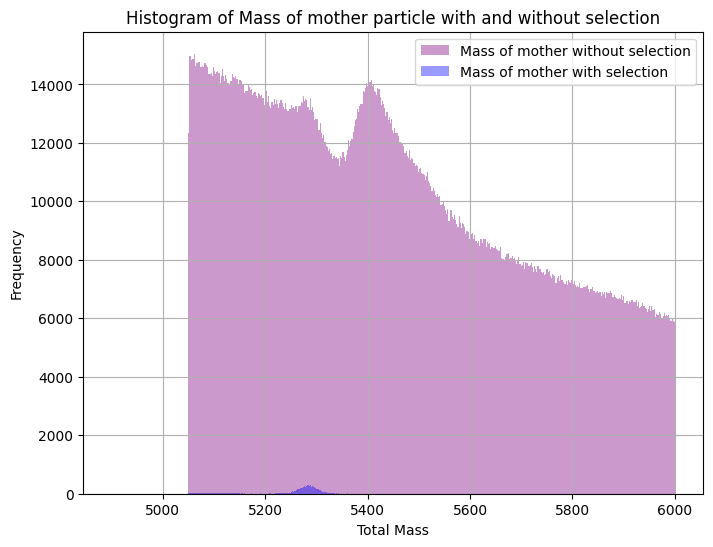

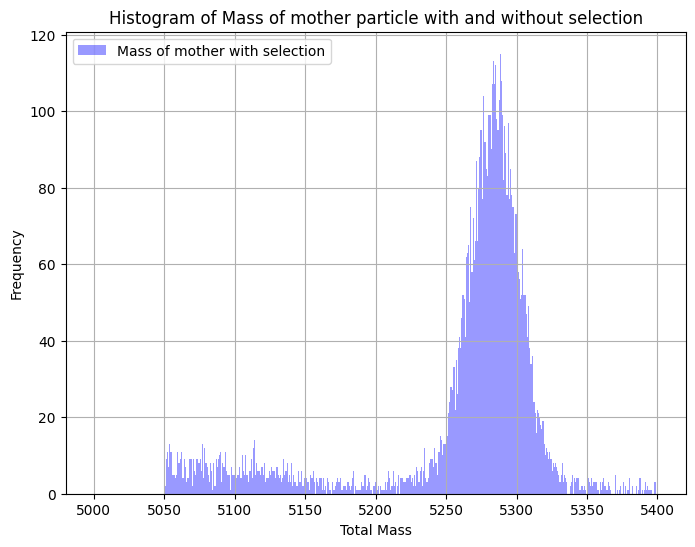

In [18]:
# plot old mass of mother and new mass of mother (calculated from cuttree)


plt.figure(figsize=(8, 6))
plt.hist(mass_mother, bins=500, color='purple', alpha=0.4 , range=(4900, 6000), label=("Mass of mother without selection") )
plt.hist(Cmass_mother, bins=500, color='blue', alpha=0.4, range=(4900, 6000) , label=("Mass of mother with selection"))
plt.xlabel('Total Mass')
plt.ylabel('Frequency')
plt.title('Histogram of Mass of mother particle with and without selection')
plt.grid(True)
plt.legend()
plt.show()

# plot the mass of mother after selection(since the peak is so little for it to be more vivible)

plt.figure(figsize=(8, 6))
plt.hist(Cmass_mother, bins=500, color='blue', alpha=0.4, range=(5000, 5400) , label=("Mass of mother with selection"))
plt.xlabel('Total Mass')
plt.ylabel('Frequency')
plt.title('Histogram of Mass of mother particle with and without selection')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# the highest peak on the histogram of mass of mother particle after selection is approximately at 5280 MeV/c^2, which is
# super close to the literature value B+: 5279.34±0.12 MeV/c2. Amazing!


In [19]:
from scipy.optimize import curve_fit

bin_contents, bin_edges = np.histogram(Cmass_mother, bins=500, range=(5100, 5700)) #bin contents is my y values, bin_edges used below
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0 # bin centers are my x values

#define functions
def exp_bgnd(x,eamp, decay):
  return eamp * np.exp(-decay * x)

def gauss_sgnl(x, gamp, sigma, mean):
  return gamp * (np.exp(-(((x - mean)/sigma)**2)/2.0))/(sigma * np.sqrt(2.0*np.pi))

def fitting_function(x, eamp, decay, gamp, sigma, mean):
  return exp_bgnd(x, eamp, decay) + gauss_sgnl(x, gamp, sigma, mean)

vars_guess = [50, 1e-4, 500, 5, 5300]

# returns the optimized variables used later for fitting

vars_fit, pcov = curve_fit(fitting_function, bin_centers, bin_contents, p0=vars_guess)

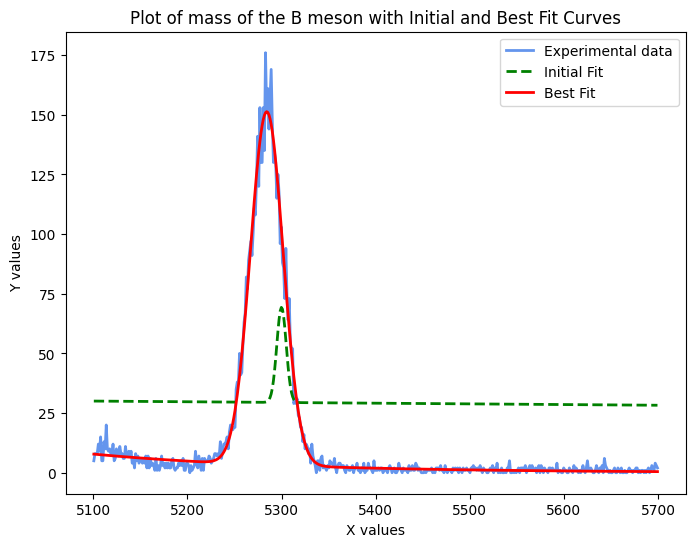

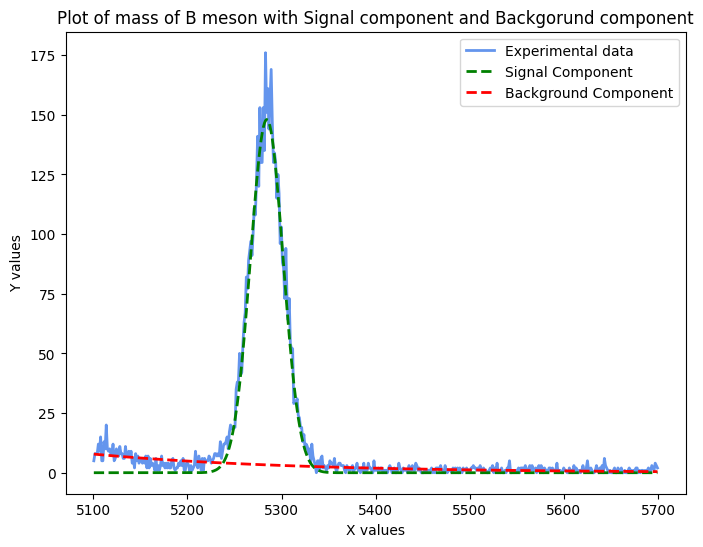

In [39]:

# calculate the initial fit and best fit curves
initial_fit_curve = fitting_function(bin_centers, *vars_guess)
best_fit_curve = fitting_function(bin_centers, *vars_fit)

plt.figure(figsize=(8, 6))

# plot the mass
plt.plot(bin_centers, bin_contents, color='cornflowerblue', linestyle='-', linewidth=2, label='Experimental data')

# plot the initial fit curve
plt.plot(bin_centers, initial_fit_curve, color='green', linestyle='--', linewidth=2, label='Initial Fit')

# plot the best fit curve
plt.plot(bin_centers, best_fit_curve, color='red', linestyle='-', linewidth=2, label='Best Fit')

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Histogram of mass of the B meson with Initial and Best Fit Curves')
plt.legend()
plt.show()


# calculate the Gaussian component (signal) and the exponential component (background)
signal_component = gauss_sgnl(bin_centers, *vars_fit[2:])
background_component = exp_bgnd(bin_centers, *vars_fit[:2])

plt.figure(figsize=(8, 6))

# plot the mass
plt.plot(bin_centers, bin_contents, color='cornflowerblue', linestyle='-', linewidth=2, label='Experimental data')

# plot the Gaussian component (signal)
plt.plot(bin_centers, signal_component, color='green', linestyle='dashed', linewidth=2, label='Signal Component')

# plot the exponential component (background)
plt.plot(bin_centers, background_component, color='red', linestyle='dashed', linewidth=2, label='Background Component')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Histogram of mass of B meson with Signal component and Backgorund component')
plt.legend()
plt.show()

In [44]:
# calculate the residuals (difference between observed and expected values)
# bin_contents is the observed (calculated mass) and best_fit_curve is the expected
residuals = bin_contents - best_fit_curve

# calculate the chi-square value
chi_square = np.sum((residuals / best_fit_curve)**2)

print("Chi-square value:", chi_square)


Chi-square value: 679.3759859195991


In [43]:
from scipy.integrate import simps
# integrate the signal component over the range (5100, 5700)
# Simposon's integration is used to evaluate the number of events
# as the area under the curve on our histogram
signal_events = simps(signal_component, bin_centers)

print("Number of signal events:", signal_events)


Number of signal events: 6431.043075807312


In [57]:
# apply another selection - create two new cuttrees - one for plus meson, another for - meson.
# For both, I throw away events, which have three positive charges and three negative charges.
# I apply the same selection as before, plus our additional condition - for the minus B meson the
# total charge of daughetrs must add up to -1 and for the plus B meson to 1

selection_minus=("(H1_ProbK>0.6)&(H2_ProbK>0.6)&(H3_ProbK>0.6)&(H1_isMuon==0)&(H2_isMuon==0)&(H3_isMuon==0)&(B_VertexChi2<6)&(H1_Charge+H2_Charge+H3_Charge==-1)")
selection_plus=("(H1_ProbK>0.6)&(H2_ProbK>0.6)&(H3_ProbK>0.6)&(H1_isMuon==0)&(H2_isMuon==0)&(H3_isMuon==0)&(B_VertexChi2<6)&(H1_Charge+H2_Charge+H3_Charge==1)")

cuttree_minus = events["DecayTree"].arrays(cut=selection_minus)
cuttree_plus = events["DecayTree"].arrays(cut=selection_plus)

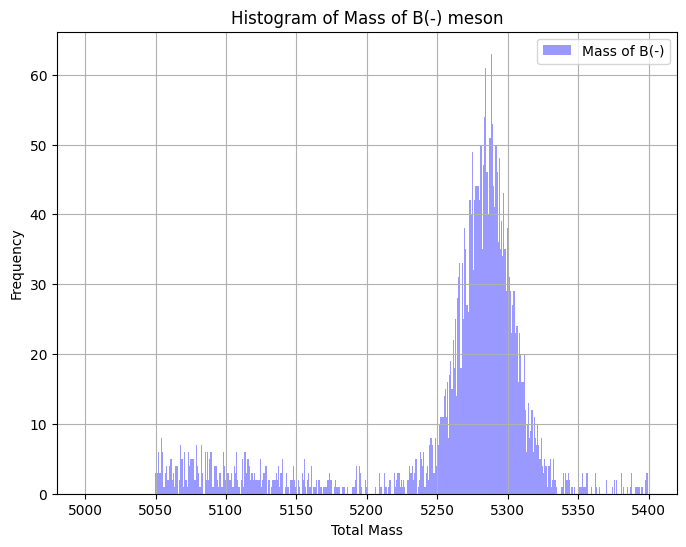

In [62]:
# define everything again, now with the cuttree_minus

Cmomentum_minus_px1 = np.array([entry["H1_PX"] for entry in cuttree_minus])

Cmomentum_minus_py1 = np.array([entry["H1_PY"] for entry in cuttree_minus])

Cmomentum_minus_pz1 = np.array([entry["H1_PZ"] for entry in cuttree_minus])

Cmomentum_minus_px2 = np.array([entry["H2_PX"] for entry in cuttree_minus])

Cmomentum_minus_py2 = np.array([entry["H2_PY"] for entry in cuttree_minus])

Cmomentum_minus_pz2 = np.array([entry["H2_PZ"] for entry in cuttree_minus])

Cmomentum_minus_px3 = np.array([entry["H3_PX"] for entry in cuttree_minus])

Cmomentum_minus_py3 = np.array([entry["H3_PY"] for entry in cuttree_minus])

Cmomentum_minus_pz3 = np.array([entry["H3_PZ"] for entry in cuttree_minus])

# calculate the total Cmomentum_minus of daughters
tot_Cmomentum_minus1 = []
tot_Cmomentum_minus2 = []
tot_Cmomentum_minus3 = []
for i in range(len(Cmomentum_minus_px1)):
    tot_Cmomentum_minus1.append(np.sqrt((Cmomentum_minus_px1[i])**2 + (Cmomentum_minus_py1[i])**2 + (Cmomentum_minus_pz1[i])**2))
for i in range(len(Cmomentum_minus_px2)):
    tot_Cmomentum_minus2.append(np.sqrt((Cmomentum_minus_px2[i])**2 + (Cmomentum_minus_py2[i])**2 + (Cmomentum_minus_pz2[i])**2))
for i in range(len(Cmomentum_minus_px3)):
    tot_Cmomentum_minus3.append(np.sqrt((Cmomentum_minus_px3[i])**2 + (Cmomentum_minus_py3[i])**2 + (Cmomentum_minus_pz3[i])**2))

# define the mass of daughters

m_daughter = 493.677 #same massfor both K+ and K-, expressed in MeV/c^2

# calculate the Cenergy_minus of daughters

Cenergy_minus_daughter1 = []
Cenergy_minus_daughter2 = []
Cenergy_minus_daughter3 = []

for i in range (len(tot_Cmomentum_minus1)):
    Cenergy_minus_daughter1.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum_minus1[i] ** 2))
    Cenergy_minus_daughter2.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum_minus2[i] ** 2))
    Cenergy_minus_daughter3.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum_minus3[i] ** 2))

Cenergy_minus_daughter1 = np.array(Cenergy_minus_daughter1)
Cenergy_minus_daughter2 = np.array(Cenergy_minus_daughter2)
Cenergy_minus_daughter3 = np.array(Cenergy_minus_daughter3)

# define the Cenergy_minus of the mother as the sum of energies of the daughters

Cenergy_minus_mother = Cenergy_minus_daughter1 + Cenergy_minus_daughter2 + Cenergy_minus_daughter3

# calculate the total Cmomentum_minus of the mother

totx_Cmomentum_minus = []
toty_Cmomentum_minus = []
totz_Cmomentum_minus = []


for i in range(len(Cmomentum_minus_px1)):
    totx_Cmomentum_minus.append(Cmomentum_minus_px1[i]+Cmomentum_minus_px2[i]+Cmomentum_minus_px3[i])
    toty_Cmomentum_minus.append(Cmomentum_minus_py1[i]+Cmomentum_minus_py2[i]+Cmomentum_minus_py3[i])
    totz_Cmomentum_minus.append(Cmomentum_minus_pz1[i]+Cmomentum_minus_pz2[i]+Cmomentum_minus_pz3[i])

mother_Cmomentum_minus=[]

for i in range(len(totx_Cmomentum_minus)):
    mother_Cmomentum_minus.append(np.sqrt(totx_Cmomentum_minus[i]**2 + toty_Cmomentum_minus[i]**2 + totz_Cmomentum_minus[i]**2))


# define Cmass_minus of the mother
Cmass_minus_mother = []
for i in range (len(tot_Cmomentum_minus1)):
    Cmass_minus_mother.append(np.sqrt(Cenergy_minus_mother[i] ** 2 - mother_Cmomentum_minus[i] ** 2))
Cmass_minus_mother = np.array(Cmass_minus_mother)

# plot the mass of mother (minus)

plt.figure(figsize=(8, 6))
plt.hist(Cmass_minus_mother, bins=500, color='blue', alpha=0.4, range=(5000, 5400) , label=("Mass of B(-)"))
plt.xlabel('Total Mass')
plt.ylabel('Frequency')
plt.title('Histogram of Mass of B(-) meson')
plt.grid(True)
plt.legend()
plt.show()



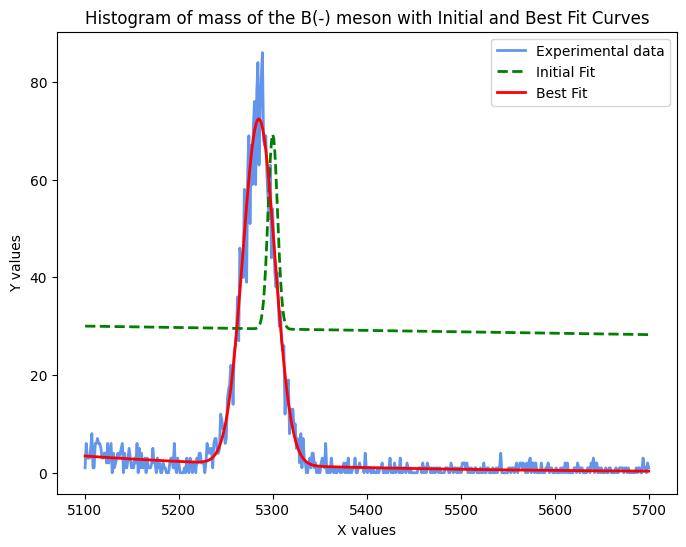

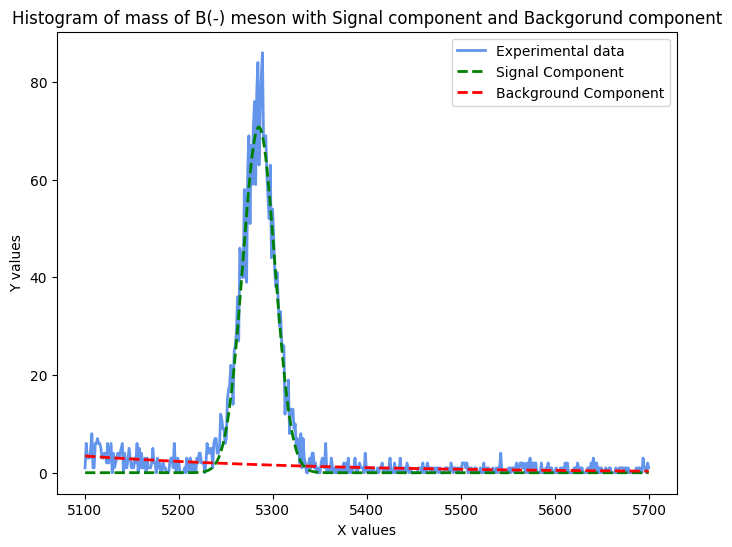

Number of signal events for B(-): 3024.282154939341


In [66]:
# perform fitting again (for the minus)

bin_contents_minus, bin_edges_minus = np.histogram(Cmass_minus_mother, bins=500, range=(5100, 5700)) #bin contents is my y values, bin_edges used below
bin_centers_minus = (bin_edges_minus[:-1] + bin_edges_minus[1:]) / 2.0 # bin centers are my x values


# returns the optimized variables used later for fitting

vars_fit_minus, pcov = curve_fit(fitting_function, bin_centers_minus, bin_contents_minus, p0=vars_guess)

# calculate the initial fit and best fit curves
initial_fit_curve_minus = fitting_function(bin_centers_minus, *vars_guess)
best_fit_curve_minus = fitting_function(bin_centers_minus, *vars_fit_minus)

plt.figure(figsize=(8, 6))

# plot the mass
plt.plot(bin_centers_minus, bin_contents_minus, color='cornflowerblue', linestyle='-', linewidth=2, label='Experimental data')

# plot the initial fit curve
plt.plot(bin_centers_minus, initial_fit_curve_minus, color='green', linestyle='--', linewidth=2, label='Initial Fit')

# plot the best fit curve
plt.plot(bin_centers_minus, best_fit_curve_minus, color='red', linestyle='-', linewidth=2, label='Best Fit')

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Histogram of mass of the B(-) meson with Initial and Best Fit Curves')
plt.legend()
plt.show()


# calculate the Gaussian component (signal) and the exponential component (background)
signal_component_minus = gauss_sgnl(bin_centers_minus, *vars_fit_minus[2:])
background_component_minus = exp_bgnd(bin_centers_minus, *vars_fit_minus[:2])

plt.figure(figsize=(8, 6))

# plot the mass
plt.plot(bin_centers_minus, bin_contents_minus, color='cornflowerblue', linestyle='-', linewidth=2, label='Experimental data')

# plot the Gaussian component (signal)
plt.plot(bin_centers_minus, signal_component_minus, color='green', linestyle='dashed', linewidth=2, label='Signal Component')

# plot the exponential component (background)
plt.plot(bin_centers_minus, background_component_minus, color='red', linestyle='dashed', linewidth=2, label='Background Component')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Histogram of mass of B(-) meson with Signal component and Backgorund component')
plt.legend()
plt.show()

# integrate the signal component over the range (5100, 5700)
# Simposon's integration is used to evaluate the number of events
# as the area under the curve on our histogram
signal_events_minus = simps(signal_component_minus, bin_centers_minus)

print("Number of signal events for B(-):", signal_events_minus)


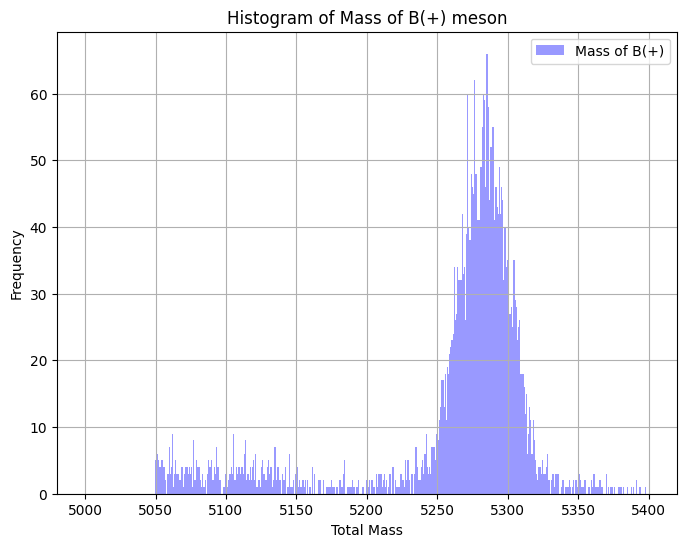

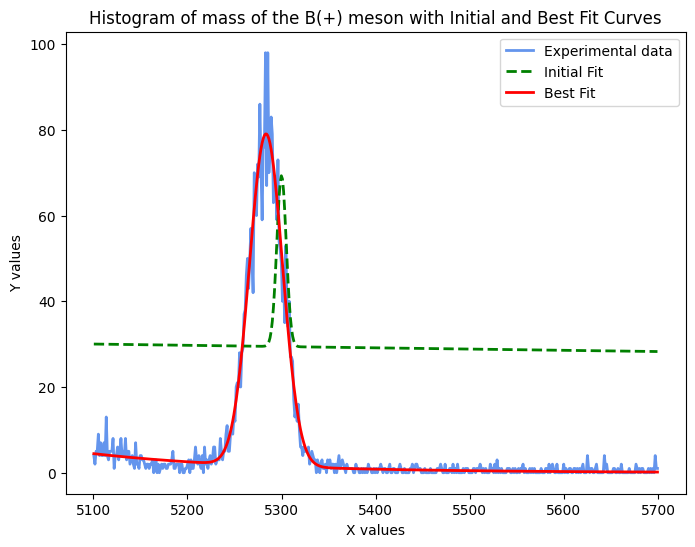

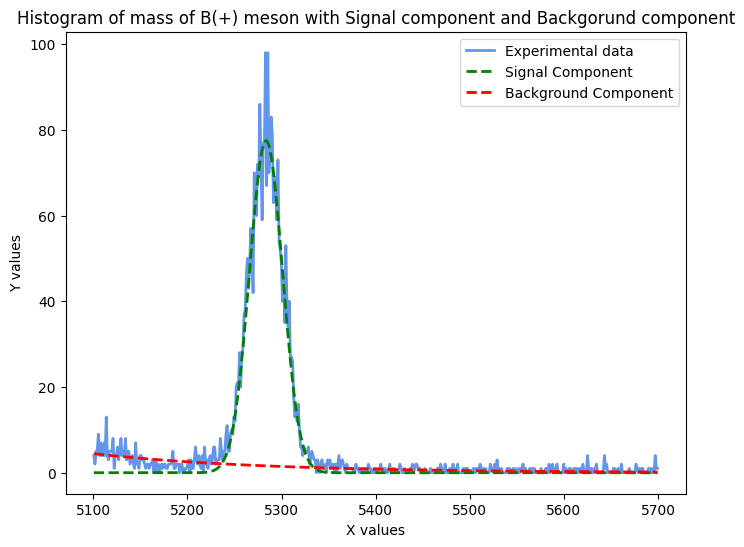

Number of signal events for B(+): 3408.1749179285707


In [67]:
# define everything again, now with the cuttree_plus

Cmomentum_plus_px1 = np.array([entry["H1_PX"] for entry in cuttree_plus])

Cmomentum_plus_py1 = np.array([entry["H1_PY"] for entry in cuttree_plus])

Cmomentum_plus_pz1 = np.array([entry["H1_PZ"] for entry in cuttree_plus])

Cmomentum_plus_px2 = np.array([entry["H2_PX"] for entry in cuttree_plus])

Cmomentum_plus_py2 = np.array([entry["H2_PY"] for entry in cuttree_plus])

Cmomentum_plus_pz2 = np.array([entry["H2_PZ"] for entry in cuttree_plus])

Cmomentum_plus_px3 = np.array([entry["H3_PX"] for entry in cuttree_plus])

Cmomentum_plus_py3 = np.array([entry["H3_PY"] for entry in cuttree_plus])

Cmomentum_plus_pz3 = np.array([entry["H3_PZ"] for entry in cuttree_plus])

# calculate the total Cmomentum_plus of daughters
tot_Cmomentum_plus1 = []
tot_Cmomentum_plus2 = []
tot_Cmomentum_plus3 = []
for i in range(len(Cmomentum_plus_px1)):
    tot_Cmomentum_plus1.append(np.sqrt((Cmomentum_plus_px1[i])**2 + (Cmomentum_plus_py1[i])**2 + (Cmomentum_plus_pz1[i])**2))
for i in range(len(Cmomentum_plus_px2)):
    tot_Cmomentum_plus2.append(np.sqrt((Cmomentum_plus_px2[i])**2 + (Cmomentum_plus_py2[i])**2 + (Cmomentum_plus_pz2[i])**2))
for i in range(len(Cmomentum_plus_px3)):
    tot_Cmomentum_plus3.append(np.sqrt((Cmomentum_plus_px3[i])**2 + (Cmomentum_plus_py3[i])**2 + (Cmomentum_plus_pz3[i])**2))

# define the mass of daughters

m_daughter = 493.677 #same massfor both K+ and K-, expressed in MeV/c^2

# calculate the Cenergy_plus of daughters

Cenergy_plus_daughter1 = []
Cenergy_plus_daughter2 = []
Cenergy_plus_daughter3 = []

for i in range (len(tot_Cmomentum_plus1)):
    Cenergy_plus_daughter1.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum_plus1[i] ** 2))
    Cenergy_plus_daughter2.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum_plus2[i] ** 2))
    Cenergy_plus_daughter3.append(np.sqrt(m_daughter ** 2 + tot_Cmomentum_plus3[i] ** 2))

Cenergy_plus_daughter1 = np.array(Cenergy_plus_daughter1)
Cenergy_plus_daughter2 = np.array(Cenergy_plus_daughter2)
Cenergy_plus_daughter3 = np.array(Cenergy_plus_daughter3)

# define the Cenergy_plus of the mother as the sum of energies of the daughters

Cenergy_plus_mother = Cenergy_plus_daughter1 + Cenergy_plus_daughter2 + Cenergy_plus_daughter3

# calculate the total Cmomentum_plus of the mother

totx_Cmomentum_plus = []
toty_Cmomentum_plus = []
totz_Cmomentum_plus = []


for i in range(len(Cmomentum_plus_px1)):
    totx_Cmomentum_plus.append(Cmomentum_plus_px1[i]+Cmomentum_plus_px2[i]+Cmomentum_plus_px3[i])
    toty_Cmomentum_plus.append(Cmomentum_plus_py1[i]+Cmomentum_plus_py2[i]+Cmomentum_plus_py3[i])
    totz_Cmomentum_plus.append(Cmomentum_plus_pz1[i]+Cmomentum_plus_pz2[i]+Cmomentum_plus_pz3[i])

mother_Cmomentum_plus=[]

for i in range(len(totx_Cmomentum_plus)):
    mother_Cmomentum_plus.append(np.sqrt(totx_Cmomentum_plus[i]**2 + toty_Cmomentum_plus[i]**2 + totz_Cmomentum_plus[i]**2))


# define Cmass_plus of the mother
Cmass_plus_mother = []
for i in range (len(tot_Cmomentum_plus1)):
    Cmass_plus_mother.append(np.sqrt(Cenergy_plus_mother[i] ** 2 - mother_Cmomentum_plus[i] ** 2))
Cmass_plus_mother = np.array(Cmass_plus_mother)

# plot the mass of mother (plus)

plt.figure(figsize=(8, 6))
plt.hist(Cmass_plus_mother, bins=500, color='blue', alpha=0.4, range=(5000, 5400) , label=("Mass of B(+)"))
plt.xlabel('Total Mass')
plt.ylabel('Frequency')
plt.title('Histogram of Mass of B(+) meson')
plt.grid(True)
plt.legend()
plt.show()

# perform fitting again (for the plus)

bin_contents_plus, bin_edges_plus = np.histogram(Cmass_plus_mother, bins=500, range=(5100, 5700)) #bin contents is my y values, bin_edges used below
bin_centers_plus = (bin_edges_plus[:-1] + bin_edges_plus[1:]) / 2.0 # bin centers are my x values


# returns the optimized variables used later for fitting

vars_fit_plus, pcov = curve_fit(fitting_function, bin_centers_plus, bin_contents_plus, p0=vars_guess)

# calculate the initial fit and best fit curves
initial_fit_curve_plus = fitting_function(bin_centers_plus, *vars_guess)
best_fit_curve_plus = fitting_function(bin_centers_plus, *vars_fit_plus)

plt.figure(figsize=(8, 6))

# plot the mass
plt.plot(bin_centers_plus, bin_contents_plus, color='cornflowerblue', linestyle='-', linewidth=2, label='Experimental data')

# plot the initial fit curve
plt.plot(bin_centers_plus, initial_fit_curve_plus, color='green', linestyle='--', linewidth=2, label='Initial Fit')

# plot the best fit curve
plt.plot(bin_centers_plus, best_fit_curve_plus, color='red', linestyle='-', linewidth=2, label='Best Fit')

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Histogram of mass of the B(+) meson with Initial and Best Fit Curves')
plt.legend()
plt.show()


# calculate the Gaussian component (signal) and the exponential component (background)
signal_component_plus = gauss_sgnl(bin_centers_plus, *vars_fit_plus[2:])
background_component_plus = exp_bgnd(bin_centers_plus, *vars_fit_plus[:2])

plt.figure(figsize=(8, 6))

# plot the mass
plt.plot(bin_centers_plus, bin_contents_plus, color='cornflowerblue', linestyle='-', linewidth=2, label='Experimental data')

# plot the Gaussian component (signal)
plt.plot(bin_centers_plus, signal_component_plus, color='green', linestyle='dashed', linewidth=2, label='Signal Component')

# plot the exponential component (background)
plt.plot(bin_centers_plus, background_component_plus, color='red', linestyle='dashed', linewidth=2, label='Background Component')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Histogram of mass of B(+) meson with Signal component and Backgorund component')
plt.legend()
plt.show()

# integrate the signal component over the range (5100, 5700)
# Simposon's integration is used to evaluate the number of events
# as the area under the curve on our histogram
signal_events_plus = simps(signal_component_plus, bin_centers_plus)

print("Number of signal events for B(+):", signal_events_plus)


In [72]:
# now our final calculation for assymetry and uncertainty:


assymetry = (signal_events_minus - signal_events_plus)/(signal_events_minus + signal_events_plus)

uncertainty = np.sqrt((1-assymetry**2)/(signal_events_minus + signal_events_plus))

print('Assymetry between the B(+) and B(-) mesons is:' ,assymetry, "with uncertainty:" ,uncertainty)

Assymetry between the B(+) and B(-) mesons is: -0.05968057907583843 with uncertainty: 0.012446199046008242
